In [13]:
%pylab inline
import pandas as pd
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
import cartopy

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# airports

In [15]:
airports = pd.read_csv('airports.dat', delimiter=',', header=None, index_col=0, 
                       names=['id', 'name', 'city', 'country', 'faa', 'icao', 
                              'lat', 'lon', 'alt', 'tz', 'dst'])
china_airports = airports[airports['country']=='China']
china_airports.head()

,name,city,country,faa,icao,lat,lon,alt,tz,dst
id,,,,,,,,,,
3364,Capital Intl,Beijing,China,PEK,ZBAA,40.080111,116.584556,116,8,U
6817,Hongyuan Airfield,Hongyuan,China,NaN,\N,32.800428,102.534785,11500,8,N
3366,Dongshan,Hailar,China,HLD,ZBLA,49.204997,119.825000,2169,8,U
3368,Binhai,Tianjin,China,TSN,ZBTJ,39.124353,117.346183,10,8,U
3369,Wusu,Taiyuan,China,TYN,ZBYN,37.746897,112.628428,2575,8,U


# airlines

In [16]:
airlines = pd.read_csv('airlines.dat', delimiter=',', header=None, index_col=0, 
                       na_values='\\N', 
                       names=['id', 'name', 'alias', 'iata', 'icao', 'callsign', 
                              'country', 'active'])
airlines.head()

,name,alias,iata,icao,callsign,country,active
id,,,,,,,
1,Private flight,NaN,-,NaN,NaN,NaN,Y
2,135 Airways,NaN,NaN,GNL,GENERAL,United States,N
3,1Time Airline,NaN,1T,RNX,NEXTIME,South Africa,Y
4,2 Sqn No 1 Elementary Flying Training School,NaN,NaN,WYT,NaN,United Kingdom,N
5,213 Flight Unit,NaN,NaN,TFU,NaN,Russia,N


# routes

In [17]:
routes = pd.read_csv('routes.dat', delimiter=',', header=None, index_col=0, 
                     na_values='\\N', names=['airline', 'airlineid', 's-port', 
                                             's-port-id', 'd-port', 
                           'd-port-id', 'codeshare', 'stops', 'equipment'])
freq = routes['d-port'].value_counts()
freq.name='freq'
airports.join(freq, on='faa')

r_2 = pd.merge(routes, airports[['faa', 'lon', 'lat', 'country']], 
               left_on='s-port', right_on='faa', how='left')
r_3 = r_2.rename(columns={'lon': 'slon', 'lat': 'slat'})

r_4 = pd.merge(r_3, airports[['faa', 'lon', 'lat', 'country']], 
               left_on='d-port', right_on='faa', how='left')
r_5 = r_4.rename(columns={'lon': 'dlon', 'lat': 'dlat'})
r = r_5.drop(['airlineid', 's-port-id', 'd-port-id', 'codeshare', 
                'stops', 'equipment', 'faa_x', 'faa_y'], axis='columns')
r = r[(r['country_x'] == 'China')]
r = r.dropna(axis='rows', how='any')
r.head()

,s-port,d-port,slon,slat,country_x,dlon,dlat,country_y
48,URC,DYU,87.474244,43.907106,China,68.825000,38.543333,Tajikistan
49,URC,DYU,87.474244,43.907106,China,68.825000,38.543333,Tajikistan
50,URC,DYU,87.474244,43.907106,China,68.825000,38.543333,Tajikistan
201,PEK,TAS,116.584556,40.080111,China,69.281186,41.257861,Uzbekistan
202,PEK,TAS,116.584556,40.080111,China,69.281186,41.257861,Uzbekistan


# draw a map

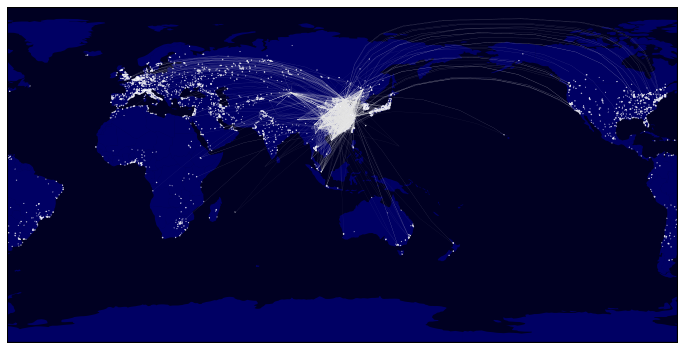

In [18]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=115))
ax.set_extent([-180, 180, -90, 90])

# base map
f = '110m_cultural/ne_110m_admin_0_countries.shp'
ax.add_geometries(Reader(f).geometries(), ccrs.PlateCarree(), color='none', 
                  facecolor='b', alpha=0.3)
ax.background_patch.set_color('#000022')

# urban
urbanfile = '50m_cultural/ne_50m_urban_areas.shp'
ax.add_geometries(Reader(urbanfile).geometries(), ccrs.PlateCarree(), 
                  color='w', alpha=0.7)
ax.plot([r['slon'].values, r['dlon'].values], [r['slat'].values, r['dlat'].values], 
        linewidth=0.3, alpha=0.1, transform=ccrs.Geodetic(), color='w')
plt.show()